**Imports and Setup**

In [9]:
pf_id = 2

In [10]:
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)

In [11]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.util import ema_logging

from ema_workbench import (ScalarOutcome, Scenario)

ema_logging.log_to_stderr(ema_logging.INFO)

model, planning_steps = get_model_for_problem_formulation(pf_id)

In [12]:
# do nothing policy
from ema_workbench import Policy
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 2':0,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 2':0,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 2':0,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0
                                  })]
policies

[Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0, 'EWS_DaysToThreat': 0})]

In [13]:
#base scenario; it's the average of the range of each uncertainty
scenarios = [Scenario('baseline', **{'discount rate 0':3,
                                       'discount rate 1':3,
                                       'discount rate 2':3,
                                       'A.1_Bmax' : 190,
                                       'A.1_Brate':1.5,
                                       'A.1_pfail':0.5,
                                       'A.2_Bmax': 190,
                                       'A.2_Brate':1.5,
                                       'A.2_pfail':0.5,
                                       'A.3_Bmax' : 190,
                                       'A.3_Brate':1.5,
                                       'A.3_pfail':0.5,
                                       'A.4_Bmax':190,
                                       'A.4_Brate':1.5,
                                       'A.4_pfail':0.5,
                                       'A.5_Bmax' : 190,
                                       'A.5_Brate':1.5,
                                       'A.5_pfail':0.5,
                                       'A.0_ID flood wave shape' :66}),
             Scenario('worstcase', **{'discount rate 0':4.5,
                                       'discount rate 1':4.5,
                                       'discount rate 2':4.5,
                                       'A.1_Bmax' : 350,
                                       'A.1_Brate':10,
                                       'A.1_pfail':1,
                                       'A.2_Bmax': 350,
                                       'A.2_Brate':10,
                                       'A.2_pfail':1,
                                       'A.3_Bmax' : 350,
                                       'A.3_Brate':10,
                                       'A.3_pfail':1,
                                       'A.4_Bmax':350,
                                       'A.4_Brate':10,
                                       'A.4_pfail':1,
                                       'A.5_Bmax' : 350,
                                       'A.5_Brate':10,
                                       'A.5_pfail':1,
                                       'A.0_ID flood wave shape' :132})]
scenarios

[Scenario({'discount rate 0': 3, 'discount rate 1': 3, 'discount rate 2': 3, 'A.1_Bmax': 190, 'A.1_Brate': 1.5, 'A.1_pfail': 0.5, 'A.2_Bmax': 190, 'A.2_Brate': 1.5, 'A.2_pfail': 0.5, 'A.3_Bmax': 190, 'A.3_Brate': 1.5, 'A.3_pfail': 0.5, 'A.4_Bmax': 190, 'A.4_Brate': 1.5, 'A.4_pfail': 0.5, 'A.5_Bmax': 190, 'A.5_Brate': 1.5, 'A.5_pfail': 0.5, 'A.0_ID flood wave shape': 66}),
 Scenario({'discount rate 0': 4.5, 'discount rate 1': 4.5, 'discount rate 2': 4.5, 'A.1_Bmax': 350, 'A.1_Brate': 10, 'A.1_pfail': 1, 'A.2_Bmax': 350, 'A.2_Brate': 10, 'A.2_pfail': 1, 'A.3_Bmax': 350, 'A.3_Brate': 10, 'A.3_pfail': 1, 'A.4_Bmax': 350, 'A.4_Brate': 10, 'A.4_pfail': 1, 'A.5_Bmax': 350, 'A.5_Brate': 10, 'A.5_pfail': 1, 'A.0_ID flood wave shape': 132})]

reference; If we are searching over levers, what values should we assume for the uncertainties? Reference allows us to specify this. If searchover is set to levers, reference should be a Scenario or None, while if searchover is uncertainties, reference should be a Policy or None. In case of a None, the default values of the underlying model are unchanged

**Check convergence with epsilon progress and hypervolume**

In [14]:
epsilons= [.05, .05, .05, .05, .05]

In [15]:
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1e+08, 1e+09, 1e+10, 1000, .1]),
               EpsilonProgress()]

In [16]:
with MultiprocessingEvaluator(model) as evaluator:
    output = evaluator.optimize(nfe=10, searchover='levers', reference = scenarios[1],
                                              epsilons=epsilons,
                                              convergence=convergence)


  0%|                                                   | 0/10 [00:00<?, ?it/s]
100it [02:21,  1.41s/it]                                                       
[MainProcess/INFO] optimization completed, found 3 solutions


In [24]:
from ema_workbench import save_results
experiment_number = 1
try:
    save_results(output, './output/directed_search/Directed_Search_id_%s.tar.gz'%experiment_number)
except KeyError as e:
    print("Unable to save as .tar.gz file")
    print('KeyError:' + str(e))

Unable to save as .tar.gz file
KeyError:'hypervolume'


In [25]:
import pickle
filehandler = open('./output/directed_search/Directed_Search.kwakkel', 'wb')
pickle.dump(output, filehandler)

In [26]:
results, convergence = output

try:
    results.to_csv('./output/directed_search/Directed_Search_id_%s_results.csv'%experiment_number, index=False)
    convergence.to_csv('./output/directed_search/Directed_Search_id_%s_convergence.csv'%experiment_number, index=False)
except:
    print("Unable to save as csv files")

In [27]:
outcomes = results.loc[:,['Expected Annual Damage','Dike Investment Costs','RfR Investment Costs','Evacuation Costs','Expected Number of Deaths']]
len(outcomes)

3

In [28]:
results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1,0,0,0,0,1,1,1,0,0,...,8,3,6,1,1,0.0,6.258220e+08,3.638000e+08,0.0,0.0
1,1,0,0,0,0,1,1,1,0,0,...,1,1,4,2,5,0.0,5.148355e+08,6.199000e+08,0.0,0.0
2,0,1,1,0,0,1,0,0,0,1,...,8,10,9,8,3,0.0,5.130258e+08,1.262800e+09,0.0,0.0


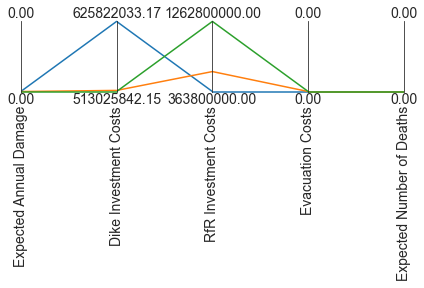

In [29]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

# we invert this axis so direction of desirability is the same
#axes.invert_axis('max_P')
plt.show()

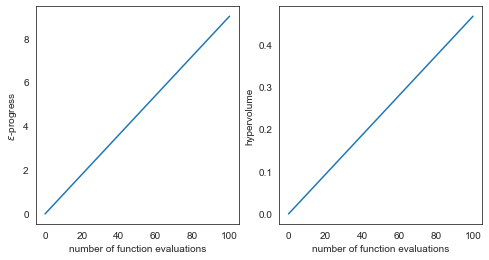

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

## Trash: